# Exploring and Processing Data

In [67]:
#install packages
#!pip install kaggle
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install scipy

distutils: c:\users\phtes\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\phtes\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\phtes\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\phtes\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None


In [25]:
# imports
import kaggle
import pandas as pd
import numpy as np
import os

## Import Data

In [2]:
# set the path of the raw data
!kaggle competitions download -c titanic -p ../data/raw 

In [3]:
# read the data with all default parameters
import zipfile
with zipfile.ZipFile("../data/raw/titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("../data/raw")

In [8]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')
type(train_df)

pandas.core.frame.DataFrame

## Basic Structure

In [6]:
# use .info() to get brief information about the dataframe 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_df['Survived'] = -888 # Adding Survived with a default value

In [34]:
df = pd.concat((train_df, test_df),axis=0)
df = df.reset_index(drop=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [36]:
# use .head(x) to get top x rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
# use .tail(x) to get last x rows
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1299,1300,-888,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,-888,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,-888,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,-888,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,-888,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,-888,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,-888,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,-888,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,-888,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,-888,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [38]:
# column selection using dot
df.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [39]:
# selection using column name as string
df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [40]:
# selecting multiple columns using a list of column name strings
df[['Name','Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
1304,"Spector, Mr. Woolf",NaN
1305,"Oliva y Ocana, Dona. Fermina",39.0
1306,"Saether, Mr. Simon Sivertsen",38.5
1307,"Ware, Mr. Frederick",NaN


In [41]:
# indexing : use loc for label based indexing 
# all columns
df.loc[5:10,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [43]:
# selecting column range
df.loc[5:10, 'Pclass' : 'Age']

,Pclass,Name,Sex,Age
5,3,"Moran, Mr. James",male,NaN
6,1,"McCarthy, Mr. Timothy J",male,54.0
7,3,"Palsson, Master. Gosta Leonard",male,2.0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0


In [44]:
# selecting discrete columns
df.loc[5:10, ['Survived', 'Fare','Embarked']]

,Survived,Fare,Embarked
5,0,8.4583,Q
6,0,51.8625,S
7,0,21.0750,S
8,1,11.1333,S
9,1,30.0708,C
10,1,16.7000,S


In [45]:
# indexing : use iloc for position based indexing 
df.iloc[5:10, 3:8]

,Name,Sex,Age,SibSp,Parch
5,"Moran, Mr. James",male,NaN,0,0
6,"McCarthy, Mr. Timothy J",male,54.0,0,0
7,"Palsson, Master. Gosta Leonard",male,2.0,3,1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0


In [46]:
# filter rows based on the condition 
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passengers : {0}'.format(len(male_passengers)))

Number of male passengers : 843


In [47]:
# use & or | operators to build complex logic
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print('Number of male passengers in first class: {0}'.format(len(male_passengers_first_class)))

Number of male passengers in first class: 179


## Summary Statistics

In [48]:
# use .describe() to get statistics for all numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,-283.301757,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,414.337413,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,-888.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,-888.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [49]:
# numerical feature
# centrality measures
print('Mean fare : {0}'.format(df.Fare.mean())) # mean
print('Median fare : {0}'.format(df.Fare.median())) # median

Mean fare : 33.29547928134557
Median fare : 14.4542


In [50]:
# dispersion measures
print('Min fare : {0}'.format(df.Fare.min())) # minimum
print('Max fare : {0}'.format(df.Fare.max())) # maximum
print('Fare range : {0}'.format(df.Fare.max()  - df.Fare.min())) # range
print('25 percentile : {0}'.format(df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(df.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2678.959737892891
Standard deviation fare : 51.75866823917411


In [54]:
import matplotlib
%matplotlib inline

<AxesSubplot:>

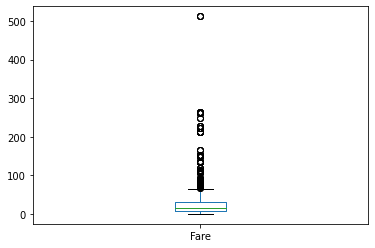

In [55]:
# box-whisker plot
df.Fare.plot(kind='box')

In [56]:
# use .describe(include='all') to get statistics for all  columns including non-numeric ones
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,-283.301757,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,414.337413,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,-888.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,-888.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [57]:
# categorical column : Counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [58]:
# categorical column : Proprotions
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [59]:
# apply on other columns
df[df.Survived != -888].Survived.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [60]:
# count : Passenger class
df.Pclass.value_counts() 

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:>

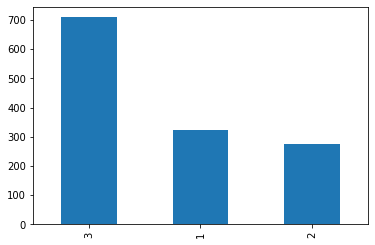

In [61]:
# visualize counts
df.Pclass.value_counts().plot(kind='bar')

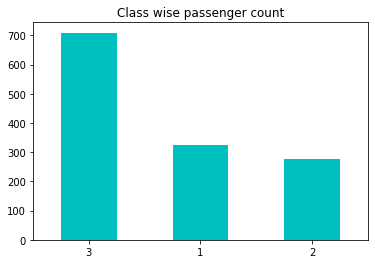

In [62]:
# title : to set title, color : to set color,  rot : to rotate labels 
df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count', color='c');

## Distributions

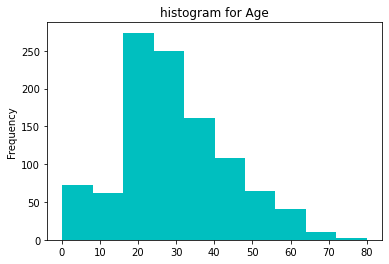

In [63]:
# use hist to create histogram
df.Age.plot(kind='hist', title='histogram for Age', color='c');

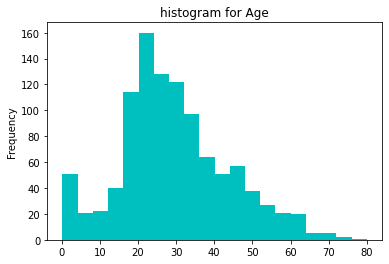

In [64]:
# use bins to add or remove bins
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20);

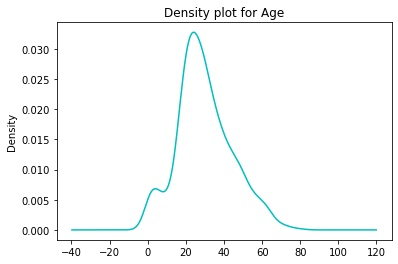

In [68]:
# use kde for density plot
import scipy
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

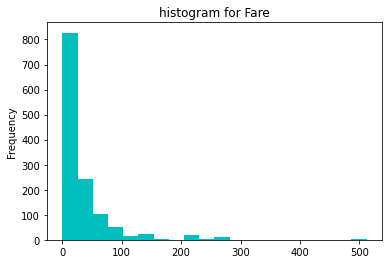

In [69]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

In [70]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for age : 0.41
skewness for fare : 4.37


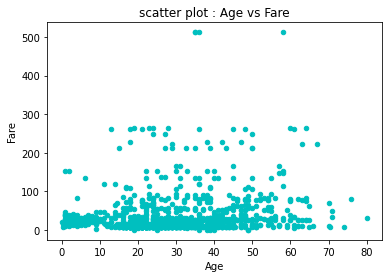

In [71]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

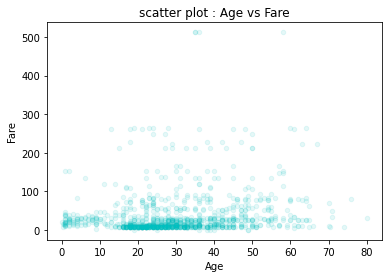

In [72]:
# use alpha to set the transparency
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare', alpha=0.1);

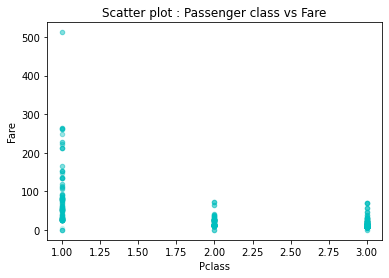

In [73]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot : Passenger class vs Fare', alpha=0.15);

## Grouping and Aggregations

In [74]:
# group by 
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [75]:
# group by 
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [76]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [79]:
df.groupby(['Pclass'])[['Fare','Age']].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [80]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [117]:
# more complicated aggregations 
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean',  # get the mean fare
        'median', # get median fare
        max,
        np.min
    },
    'Age': {     # work on the "Age" column
        'median',   # Find the max, call the result "max_date"
        min,
        max,
        lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}

In [118]:
df.groupby(['Pclass']).agg(aggregations)

Fare                              Age                       
         median       mean       max amin median <lambda_0>   min   max
Pclass                                                                 
1       60.0000  87.508992  512.3292  0.0   39.0      79.08  0.92  80.0
2       15.0458  21.179196   73.5000  0.0   29.0      69.33  0.67  70.0
3        8.0500  13.302889   69.5500  0.0   24.0      73.83  0.17  74.0

In [119]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

## Crosstabs

In [120]:
# crosstab on Sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


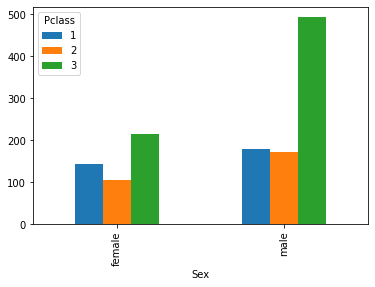

In [121]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

## Pivots

In [122]:
# pivot table
df.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [123]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [124]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging : Working with missing values

In [125]:
# use .info() to detect missing values (if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


### Feature : Embarked

In [126]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [127]:
# how many people embarked at different points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [128]:
# which embarked point has higher survival count
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [129]:
# impute the missing values with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

In [130]:
# Option 2 : explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [131]:
# replace the missing values with 'C'
df.Embarked.fillna('C', inplace=True)

In [132]:
# check if any null value remaining
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [133]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


### Feature : Fare

In [134]:
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,-888,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
print median_fare

In [ ]:
df.Fare.fillna(median_fare, inplace=True)

In [ ]:
# check info again
df.info()

### Feature : Age

In [ ]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [ ]:
# return null rows
df[df.Age.isnull()]

#### option 1 : replace all missing age with mean value

In [ ]:
df.Age.plot(kind='hist', bins=20, color='c');

In [ ]:
# get mean
df.Age.mean()

issue : due to few high values of 70's and 80's pushing the overall mean



In [ ]:
# replace the missing values
# df.Age.fillna(df.Age.mean(), inplace=True)

#### option 2 : replace with median age of gender

In [ ]:
# median values
df.groupby('Sex').Age.median()

In [ ]:
# visualize using boxplot
df[df.Age.notnull()].boxplot('Age','Sex');

In [ ]:
# replace : 
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)

In [ ]:
# option 3 : replace with median age of Pclass
df[df.Age.notnull()].boxplot('Age','Pclass');

In [ ]:
# replace : 
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_median , inplace=True)

In [ ]:
# option 4 : replace with median age of title
df.Name

In [ ]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [ ]:
# use map function to apply the function on each Name value row i
df.Name.map(lambda x : GetTitle(x)) # alternatively you can use : df.Name.map(GetTitle)

In [ ]:
df.Name.map(lambda x : GetTitle(x)).unique()

In [ ]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]



In [ ]:
# create Title feature
df['Title'] =  df.Name.map(lambda x : GetTitle(x))

In [ ]:
# head 
df.head()

In [ ]:
# Box plot of Age with title
df[df.Age.notnull()].boxplot('Age','Title');

In [ ]:
# replace missing values
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)

In [ ]:
# check info again
df.info()

## Working with outliers

### Age

In [ ]:
# use histogram to get understand the distribution
df.Age.plot(kind='hist', bins=20, color='c');

In [ ]:
df.loc[df.Age > 70]

### Fare

In [ ]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

In [ ]:
# box plot to indentify outliers 
df.Fare.plot(kind='box');

In [ ]:
# look into the outliers
df.loc[df.Fare == df.Fare.max()]

In [ ]:
# Try some transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined

In [ ]:
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);

http://hamelg.blogspot.in/2015/11/python-for-data-analysis-part-14.html

In the graph there appears to be on passenger who paid more than all the others, but the output above shows that there were actually three passengers who all paid the same high fare.
Similar to NA values, there's no single cure for outliers. You can keep them, delete them or transform them in some way to try to reduce their impact. Even if you decide to keep outliers unchanged it is still worth identifying them since they can have disproportionately large influence on your results. Let's keep the three high rollers unchanged.
Data sets can have other strange values beyond missing values and outliers that you may need to address. Sometimes data is mislabeled or simply erroneous; bad data can corrupt any sort of analysis so it is important to address these sorts of issues before doing too much work.

In [ ]:
# binning
pd.qcut(df.Fare, 4)

In [ ]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']) # discretization

In [ ]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [ ]:
# create fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

## Feature Engineering

### Feature : Age State ( Adult or Child )

In [ ]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [ ]:
# AgeState Counts
df['AgeState'].value_counts()

In [ ]:
# crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

### Feature : FamilySize

In [ ]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

In [ ]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c');

In [ ]:
# further explore this family with max family members
df.loc[df.FamilySize == df.FamilySize.max()]

In [ ]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

### Feature : IsMother

In [ ]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [ ]:
# Crosstab with IsMother
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

### Deck

In [ ]:
# explore Cabin values
df.Cabin

In [ ]:
# use unique to get unique values for Cabin feature
df.Cabin.unique()

In [ ]:
# look at the Cabin = T
df.loc[df.Cabin == 'T']

In [ ]:
# set the value to NaN
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [ ]:
# look at the unique values of Cabin again
df.Cabin.unique()

In [ ]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [ ]:
# check counts
df.Deck.value_counts()

In [ ]:
# use crosstab to look into survived feature cabin wise
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

In [ ]:
# info command 
df.info()

### Categorical Feature Encoding

In [ ]:
# sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [ ]:
# columns Deck, Pclass, Title, AgeState
df = pd.get_dummies(df,columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])

In [ ]:
print df.info()

### Drop and Reorder Columns

In [ ]:
# drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [ ]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [ ]:
# check info again
df.info()

## Save Processed Dataset

In [ ]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [ ]:
# train data
df.loc[df.Survived != -888].to_csv(write_train_path) 
# test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path) 

### Building the data processing script

In [ ]:
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [ ]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    # set the path of the raw data
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    # read the data with all default parameters
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0)
    return df



def process_data(df):
    # using the method chaining concept
    return (df
         # create title attribute - then add this 
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values)
         # create fare bin feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         # create age state
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
          # create deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         # feature encoding 
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         # add code to drop unnecessary columns
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1)
         # reorder columns
         .pipe(reorder_columns)
         )

def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    # embarked
    df.Embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median , inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df 

    
def write_data(df):
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    # train data
    df[df.Survived != -888].to_csv(write_train_path) 
    # test data
    columns = [column for column in df.columns if column != 'Survived']
    df[df.Survived == -888][columns].to_csv(write_test_path) 

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

In [ ]:
!python $get_processed_data_script_file

In [ ]:
train_df = pd.read_csv(write_train_path)
train_df.info()

In [ ]:
test_df = pd.read_csv(write_test_path)
test_df.info()

### Advanced visualization using MatPlotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.hist(df.Age)

In [ ]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

In [ ]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

In [ ]:
f , ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

In [ ]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

In [ ]:
# Adding subplots
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,7))

# Plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Age')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2, 1].axis('off') # add it later - 2
plt.tight_layout() # add it later - 1

plt.show()

In [ ]:
# family size 
family_survived = pd.crosstab(df[df.Survived != -888].FamilySize, df[df.Survived != -888].Survived)
print family_survived

In [ ]:
# impact of family size on survival rate
family_survived =  df[df.Survived != -888].groupby(['FamilySize','Survived']).size().unstack()
print family_survived

In [ ]:
family_survived.columns = ['Not Survived', 'Survived']

In [ ]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

In [ ]:
family_survived.sum(axis = 1)

In [ ]:
scaled_family_survived = family_survived.div(family_survived.sum(axis=1), axis=0)

In [ ]:
scaled_family_survived.columns = ['Not Survived', 'Survived']

In [ ]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
scaled_family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

In [ ]:
%load_ext version_information

In [ ]:
%version_information pandas, numpy, matplotlib, seaborn